In [20]:
import numpy as np
from sklearn.datasets import fetch_mldata

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [13]:
#mnist = fetch_mldata('MNIST original', data_home='./data')

In [21]:
# Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

print (train_data.shape)
print (train_labels.shape)
print (eval_data.shape)
print (eval_labels.shape)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST-data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000,)
(10000, 784)
(10000,)


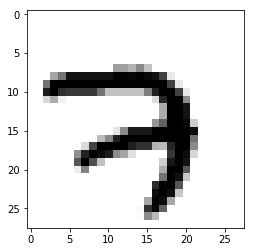

In [5]:
example = train_data[0]
example = np.reshape(example, (28, 28))

plt.imshow(example, cmap= plt.cm.binary)
plt.show()

In [7]:
# Training a SVM on mnist...

clf_svc = SVC(kernel='linear')
clf_svc.fit(train_data, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# predict labels for eval data using trained SVM..

predictions_svm = clf_svc.predict(eval_data)

In [18]:
print ('The classification accuracy is {} percent when a SVM is used...'.
       format(accuracy_score(predictions_svm, eval_labels)*100))

The classification accuracy is 93.93 percent when a SVM is used...


In [11]:
# Training a random forest classifier on mnist...

random_forest = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=1)
random_forest.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [13]:
# predict labels for eval data using trained random forest..

predictions_rf = random_forest.predict(eval_data)

In [19]:
print ('The classification accuracy is {} percent when a Random Forest classifier is used...'.
       format(accuracy_score(predictions_rf, eval_labels)*100))

The classification accuracy is 94.38 percent when a Random Forest classifier is used...
